In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import itertools

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [4]:
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')
recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629


In [5]:
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,210,221,226,229,243,244,250,253,262,265
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331


# basic checks

In [6]:
print('CONFIRMED INFO :')
print(confirmed_df.info())
print('-----------------')

print('RECOVERED INFO :')
print(recovered_df.info())
print('-----------------')

print('DEATHS INFO :')
print(deaths_df.info())
print('-----------------')

CONFIRMED INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB
None
-----------------
RECOVERED INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 490.3+ KB
None
-----------------
DEATHS INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB
None
-----------------


In [7]:
confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157171e+05,1.166240e+05,1.174654e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,5.678329e+05,5.727452e+05,5.774877e+05,5.831820e+05,5.891235e+05,5.953081e+05,6.017349e+05,6.076737e+05,6.126599e+05,6.154886e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.672500e+02,4.675000e+02,4.675000e+02,4.682500e+02,4.682500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.710000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.354500e+03,3.381000e+03,3.397000e+03,3.459000e+03,3.466000e+03,3.522500e+03,3.608000e+03,3.714500e+03,3.772000e+03,3.823500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.472475e+04,3.540750e+04,3.553900e+04,3.580200e+04,3.599400e+04,3.639525e+04,3.670825e+04,3.731275e+04,3.781650e+04,3.826325e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.485123e+06,6.520122e+06,6.553652e+06,6.592342e+06,6.630051e+06,6.674411e+06,6.723933e+06,6.768119e+06,6.804814e+06,6.856884e+06


In [8]:
recovered_df.describe() 

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02
mean,19.835137,27.997068,0.110672,0.118577,0.142292,0.154150,0.205534,0.241107,0.422925,0.498024,...,7.683461e+04,7.756891e+04,7.847586e+04,7.936355e+04,8.026853e+04,8.113512e+04,8.213040e+04,8.307036e+04,8.400322e+04,8.456361e+04
std,24.504550,67.358197,1.760345,1.764332,1.954723,2.020714,2.649732,2.852382,5.059859,5.566071,...,3.738531e+05,3.774536e+05,3.831228e+05,3.886656e+05,3.941652e+05,3.993233e+05,4.045893e+05,4.106165e+05,4.159772e+05,4.178944e+05
min,-51.796300,-106.346800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.428055,-8.224500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.680000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.800000e+02,3.800000e+02
50%,21.521757,23.881300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.991000e+03,1.991000e+03,2.071000e+03,2.094000e+03,2.104000e+03,2.112000e+03,2.128000e+03,2.197000e+03,2.239000e+03,2.369000e+03
75%,39.305400,85.240100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.997900e+04,2.008200e+04,2.120600e+04,2.153600e+04,2.175200e+04,2.266200e+04,2.316000e+04,2.336400e+04,2.336400e+04,2.336400e+04
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,3.723206e+06,3.780107e+06,3.859399e+06,3.942360e+06,4.025079e+06,4.112551e+06,4.208431e+06,4.303043e+06,4.396399e+06,4.396399e+06


In [9]:
deaths_df.describe() 

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,21.076624,22.829441,0.063910,0.067669,0.097744,0.157895,0.210526,0.308271,0.492481,0.500000,...,3459.515038,3473.206767,3489.860902,3514.481203,3536.109023,3556.620301,3578.071429,3597.740602,3611.635338,3622.906015
std,24.904600,70.191330,1.042337,1.043908,1.473615,2.453621,3.189730,4.660845,7.664297,7.664793,...,16398.950919,16453.471108,16510.259597,16636.850630,16739.311674,16831.543769,16934.234212,17019.787840,17068.307397,17102.864472
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,57.000000,57.000000,58.000000,59.000000,60.500000,61.500000,62.500000,64.000000,64.500000
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,588.000000,588.250000,611.500000,620.500000,620.500000,622.500000,629.000000,635.750000,645.500000,647.500000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,193693.000000,194071.000000,194493.000000,195781.000000,196763.000000,197633.000000,198570.000000,199282.000000,199509.000000,199865.000000


In [10]:
confirmed_df.describe(include ='O')

,Province/State,Country/Region
count,81,266
unique,81,188
top,Australian Capital Territory,China
freq,1,33


In [11]:
recovered_df.describe(include ='O')

,Province/State,Country/Region
count,67,253
unique,67,188
top,Australian Capital Territory,China
freq,1,33


In [12]:
deaths_df.describe(include ='O')

,Province/State,Country/Region
count,81,266
unique,81,188
top,Australian Capital Territory,China
freq,1,33


In [13]:
#dropping unnecessary columns

In [14]:
confirmed_df.drop(['Province/State','Lat','Long'], axis = 1, inplace = True)
recovered_df.drop(['Province/State','Lat','Long'], axis = 1, inplace = True)
deaths_df.drop(['Province/State','Lat','Long'], axis = 1, inplace = True)

In [15]:
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,Albania,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,Algeria,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,Andorra,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,Angola,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [16]:
recovered_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,Albania,0,0,0,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,Algeria,0,0,0,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,Andorra,0,0,0,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,Angola,0,0,0,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


In [17]:
deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,Albania,0,0,0,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,Algeria,0,0,0,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,Andorra,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,Angola,0,0,0,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


# EXPLORATORY DATA ANLAYSIS

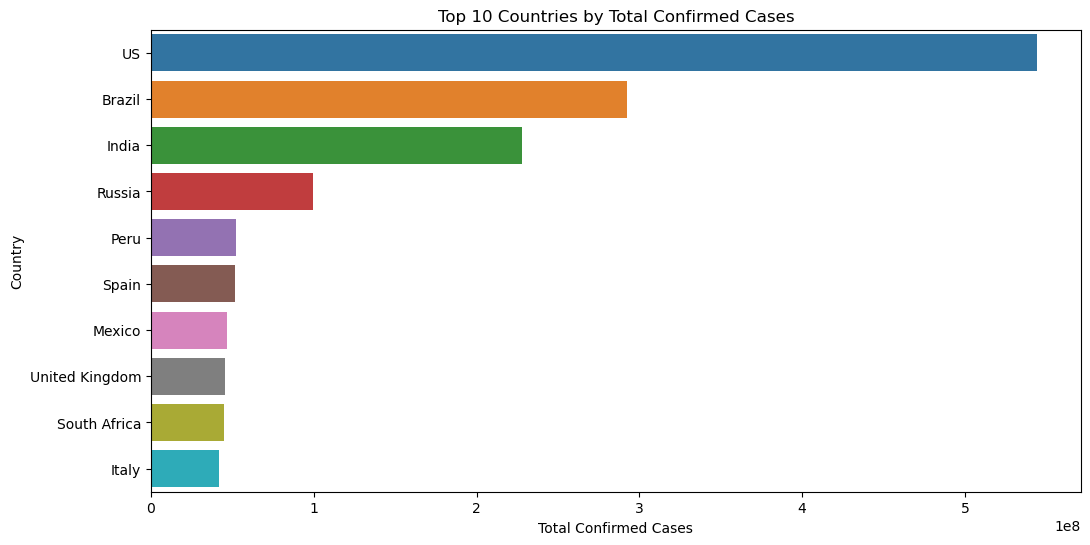

In [18]:
# Calculating total confirmed cases for each country
country_totals = confirmed_df.iloc[:, 1:].sum(axis=1)

# Creating a DataFrame for visualization
country_data = pd.DataFrame({'Country': confirmed_df['Country/Region'], 'Total Confirmed': country_totals})


plt.figure(figsize=(12, 6))
sns.barplot(x='Total Confirmed', y='Country', data=country_data.sort_values('Total Confirmed', ascending=False).head(10))
plt.title('Top 10 Countries by Total Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.show()

insights :
The data shows that the United States has the highest number of confirmed COVID-19 cases, followed by Brazil and India. This indicates significant ongoing transmission in these regions, highlighting the need for continued public health measures and vaccination efforts to control the spread of the virus.

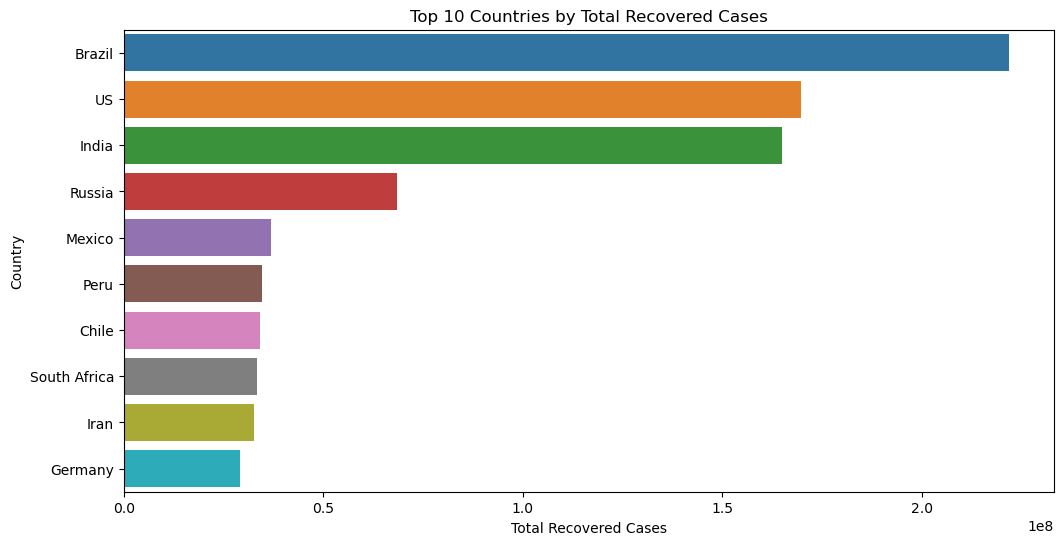

In [19]:
# Calculating total recovered cases for each country
country_totals1 = recovered_df.iloc[:, 1:].sum(axis=1)

# Creating a DataFrame for visualization
country_data1 = pd.DataFrame({'Country': recovered_df['Country/Region'], 'Total Recovered': country_totals1})

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Recovered', y='Country', data=country_data1.sort_values('Total Recovered', ascending=False).head(10))
plt.title('Top 10 Countries by Total Recovered Cases')
plt.xlabel('Total Recovered Cases')
plt.ylabel('Country')
plt.show()

insights :
In terms of recoveries, Brazil leads the way, with the United States and India following closely. This suggests that while these countries have faced high case counts, they are also effectively managing patient care and recovery, which is a positive indicator of their healthcare response during the pandemic.

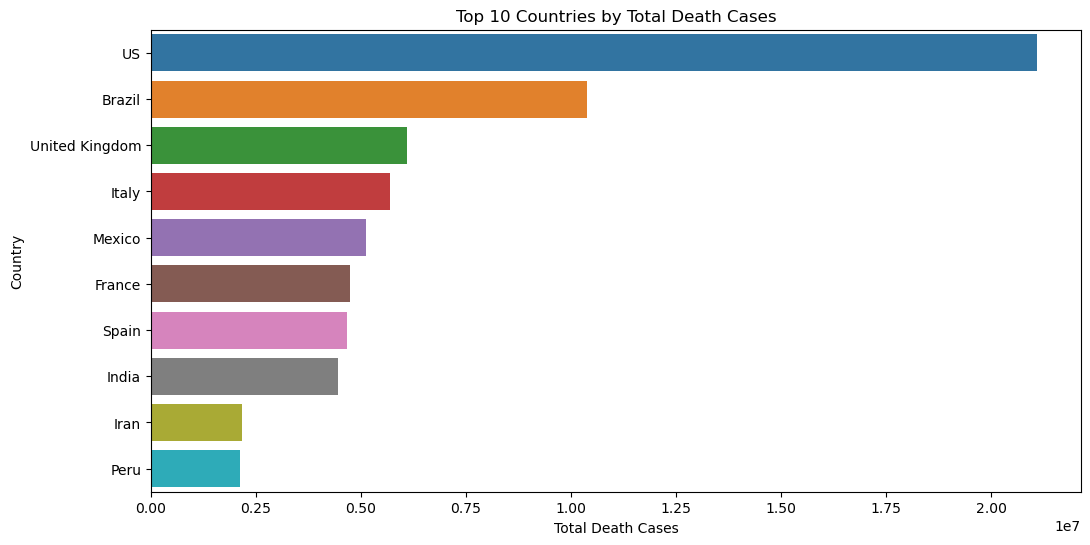

In [20]:
# Calculating  total recovered cases for each country
country_totals2 = deaths_df.iloc[:, 1:].sum(axis=1)

# Creating a DataFrame for visualization
country_data2 = pd.DataFrame({'Country': deaths_df['Country/Region'], 'Total Deaths': country_totals2})

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Deaths', y='Country', data=country_data2.sort_values('Total Deaths', ascending=False).head(10))
plt.title('Top 10 Countries by Total Death Cases')
plt.xlabel('Total Death Cases')
plt.ylabel('Country')
plt.show()

The United States has recorded the highest number of deaths due to COVID-19, followed by Brazil and the United Kingdom. This highlights the severe impact of the pandemic on these countries and underscores the critical importance of vaccination campaigns and healthcare strategies to reduce mortality rates.

# Reshaping the datasets to long format

In [21]:
confirmed_long = confirmed_df.melt(id_vars =['Country/Region'],var_name = 'Date', value_name = 'Confirmed')
recovered_long = recovered_df.melt(id_vars =['Country/Region'],var_name = 'Date', value_name = 'Recovered')
deaths_long = deaths_df.melt(id_vars =['Country/Region'],var_name = 'Date', value_name = 'Deaths')

In [22]:
#converting the Date column to datetime format

In [23]:
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
recovered_long['Date'] = pd.to_datetime(recovered_long['Date'])
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])

In [24]:
confirmed_long

,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
64899,West Bank and Gaza,2020-09-21,36151
64900,Western Sahara,2020-09-21,10
64901,Yemen,2020-09-21,2028
64902,Zambia,2020-09-21,14175


In [25]:
recovered_long

,Country/Region,Date,Recovered
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
61727,West Bank and Gaza,2020-09-21,24428
61728,Western Sahara,2020-09-21,8
61729,Yemen,2020-09-21,1235
61730,Zambia,2020-09-21,13629


In [26]:
deaths_long

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
64899,West Bank and Gaza,2020-09-21,265
64900,Western Sahara,2020-09-21,1
64901,Yemen,2020-09-21,586
64902,Zambia,2020-09-21,331


- Converting the datasets from a wide format (dates as columns) to a long format(dates as rows). This transformation is essential for time series analysis, allowing each date to correspond to its respective  cases

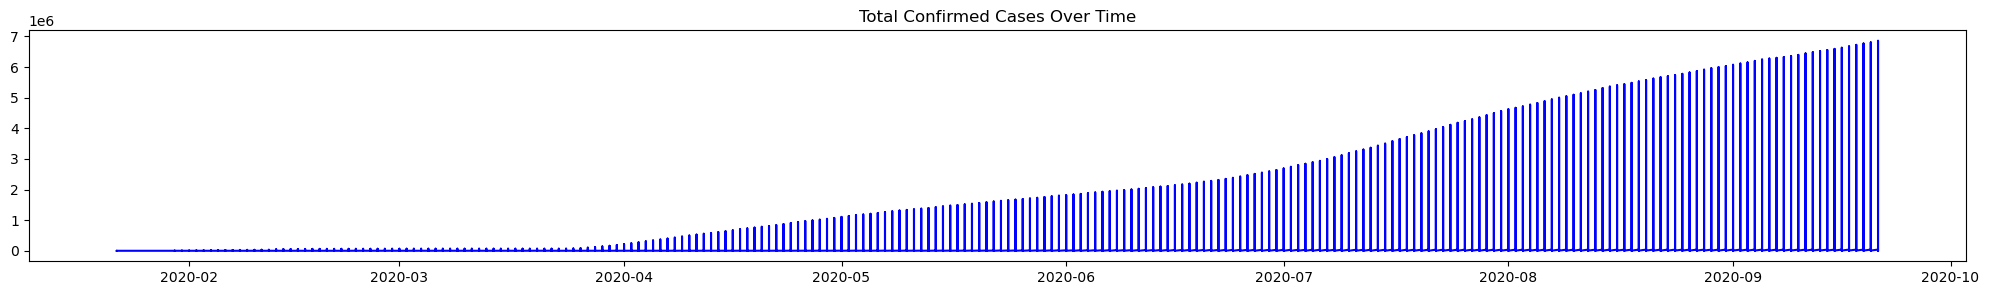

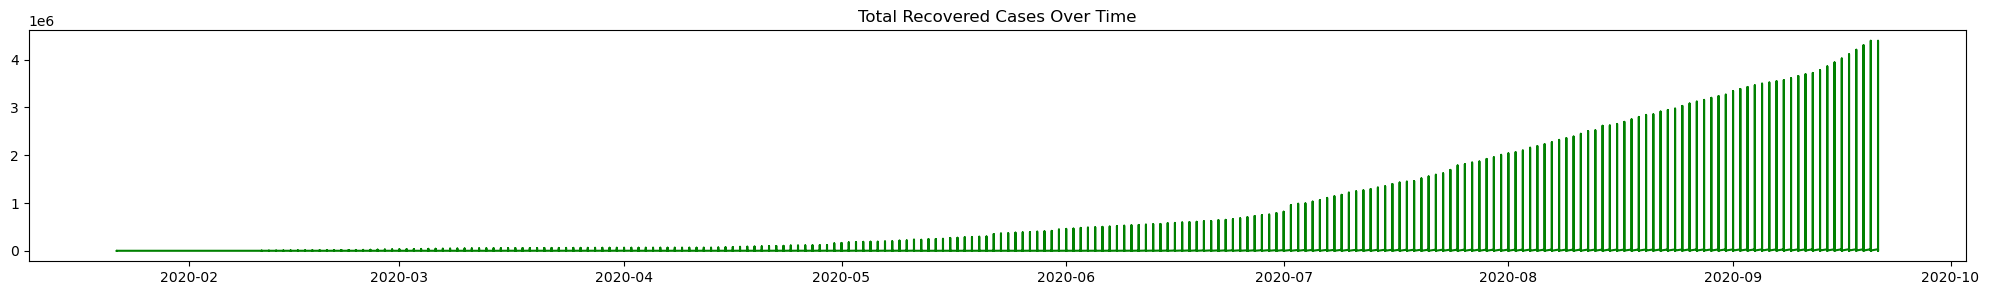

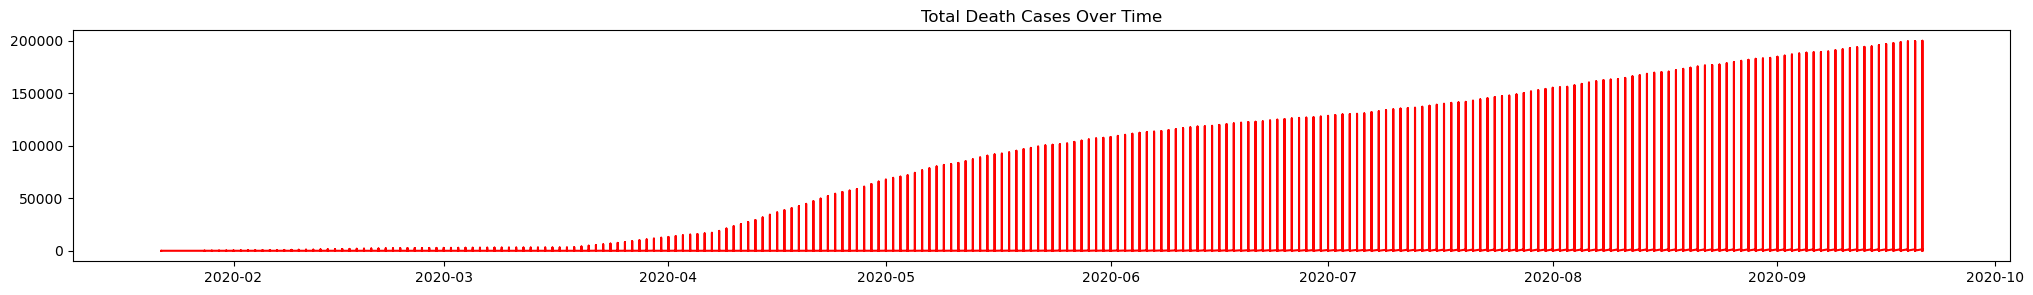

In [27]:
plt.figure(figsize=(25,3))
plt.plot(confirmed_long['Date'], confirmed_long['Confirmed'],color ='blue')
plt.title('Total Confirmed Cases Over Time')

plt.figure(figsize=(25,3))
plt.plot(recovered_long['Date'], recovered_long['Recovered'], color ='green')
plt.title('Total Recovered Cases Over Time')

plt.figure(figsize=(25,3))
plt.plot(deaths_long['Date'], deaths_long['Deaths'], color ='red')
plt.title('Total Death Cases Over Time')
plt.show()

insights : Overall, the data reflects a positive trend in managing COVID-19 cases
Confirmed Cases :

In the 1st to 3rd months, confirmed cases were minimal, with no significant spread of the virus.
Starting in the 4th month, cases began to increase steadily, raising concerns about the growing impact of the outbreak.
The 9th month saw the highest number of confirmed cases, indicating a significant surge and the need for continued public health measures.
Recovered Cases :

Initial Months: There were no recoveries until the 2nd month, with minimal cases in the 3rd and 4th months, barely visible on the graph.
Gradual Increase: Recoveries began to rise noticeably from the 6th month, showing a consistent upward trend.
Peak Recovery: The highest recoveries were observed in the 8th and 9th months, indicating a significant improvement in recovery rates over time.
Death Cases

Initial Months: There were no reported deaths until the 3rd month, with a slight increase observed in the 4th month.
Significant Spike: The 5th month saw a substantial increase in deaths, which continued to rise consistently over the following months.
Overall Comparison: Despite the increasing trend, the total number of death cases remains significantly lower than both confirmed and recovered cases, highlighting a better recovery rate relative to fatalities.

# DATA PREPROCESSING

## dropping country column

In [28]:
confirmed_long.drop('Country/Region',axis =1, inplace = True)            #since we are doing univariate analysis
recovered_long.drop('Country/Region', axis =1, inplace = True)
deaths_long.drop('Country/Region', axis =1, inplace = True)

### Aggregate the Data by date

In [29]:
confirmed_long = confirmed_long.groupby('Date')['Confirmed'].sum().reset_index()
recovered_long = recovered_long.groupby('Date')['Recovered'].sum().reset_index()
deaths_long = deaths_long.groupby('Date').sum()['Deaths'].reset_index()

In [30]:
confirmed_long

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
239,2020-09-17,30175313
240,2020-09-18,30499534
241,2020-09-19,30780755
242,2020-09-20,31021972


### Handling Null Values

In [31]:
print("Confirmed Null Values:",confirmed_long.isnull().sum().sum())
print("Recovered Null Values:",recovered_long.isnull().sum().sum())
print("Death Null Values:",deaths_long.isnull().sum().sum())

Confirmed Null Values: 0
Recovered Null Values: 0
Death Null Values: 0


### Handling Outliers

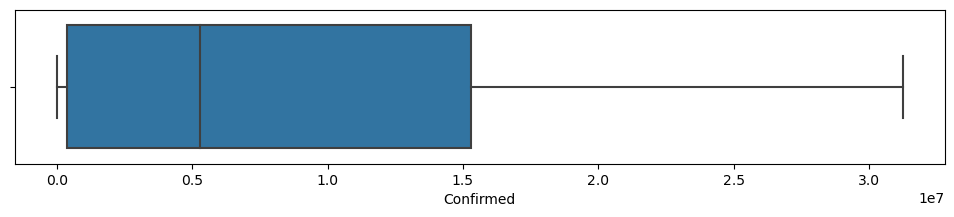

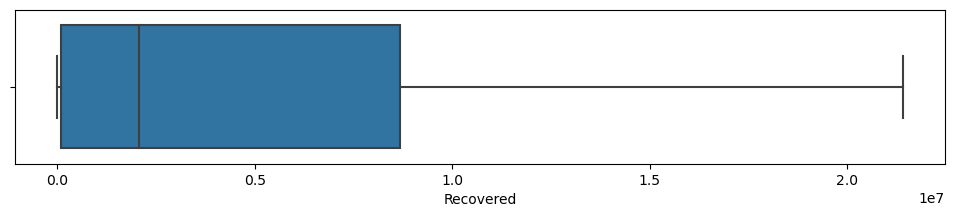

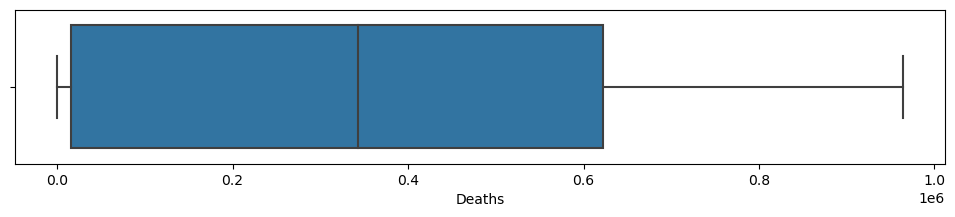

In [32]:
plt.figure(figsize=(12,2))
sns.boxplot(x = confirmed_long['Confirmed'])
plt.show()

plt.figure(figsize=(12,2))
sns.boxplot(x = recovered_long['Recovered'])
plt.show()

plt.figure(figsize=(12,2))
sns.boxplot(x = deaths_long['Deaths'])
plt.show()

# Scaling

In [33]:
scaler = MinMaxScaler()

In [34]:
confirmed_long_scaled = scaler.fit_transform(confirmed_long[['Confirmed']])

In [35]:
recovered_long_scaled = scaler.fit_transform(recovered_long[['Recovered']])

In [36]:
deaths_long_scaled = scaler.fit_transform(deaths_long[['Deaths']])

We initially applied the ARIMA model without scaling and observed high MSE, RMSE and MAE values, indicating poor accuracy. By scaling the data, we normalized the values, which improved the model's performance significantly. This adjustment led to more accurate predictions for covid cases

#### Converting  the scaled Numpy array back to a DataFrame

In [37]:
confirmed_long_scaled_df = pd.DataFrame(confirmed_long_scaled,columns =['Confirmed'],index = confirmed_long['Date'])
recovered_long_scaled_df = pd.DataFrame(recovered_long_scaled,columns =['Recovered'], index = recovered_long['Date'])
deaths_long_scaled_df = pd.DataFrame(deaths_long_scaled,columns =['Deaths'], index = deaths_long['Date'])

In [38]:
confirmed_long_scaled_df

,Confirmed
Date,
2020-01-22,0.000000
2020-01-23,0.000003
2020-01-24,0.000012
2020-01-25,0.000028
2020-01-26,0.000050
...,...
2020-09-17,0.965739
2020-09-18,0.976116
2020-09-19,0.985116


In [39]:
deaths_long_scaled_df

,Deaths
Date,
2020-01-22,0.000000
2020-01-23,0.000001
2020-01-24,0.000009
2020-01-25,0.000026
2020-01-26,0.000040
...,...
2020-09-17,0.981703
2020-09-18,0.987624
2020-09-19,0.993054


In [40]:
recovered_long_scaled_df

,Recovered
Date,
2020-01-22,0.000000e+00
2020-01-23,9.348169e-08
2020-01-24,3.739267e-07
2020-01-25,5.141493e-07
2020-01-26,1.121780e-06
...,...
2020-09-17,9.594566e-01
2020-09-18,9.712262e-01
2020-09-19,9.823417e-01


### Handling Duplicates

In [41]:
duplicate_confirmed = confirmed_long[confirmed_long.duplicated()]
print(duplicate_confirmed)

Empty DataFrame
Columns: [Date, Confirmed]
Index: []


In [42]:
duplicate_recovered = recovered_long[recovered_long.duplicated()]
print(duplicate_recovered)

Empty DataFrame
Columns: [Date, Recovered]
Index: []


In [43]:
duplicate_deaths = deaths_long[deaths_long.duplicated()]
print(duplicate_deaths)

Empty DataFrame
Columns: [Date, Deaths]
Index: []


# Stationarity Check

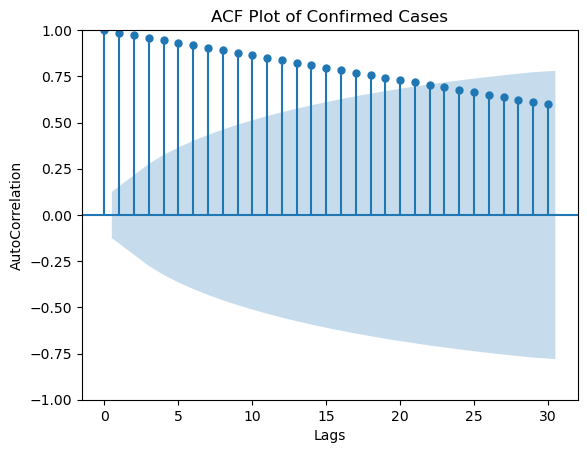

In [44]:
plot_acf(confirmed_long_scaled_df['Confirmed'], lags =30)
plt.title('ACF Plot of Confirmed Cases')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.show()

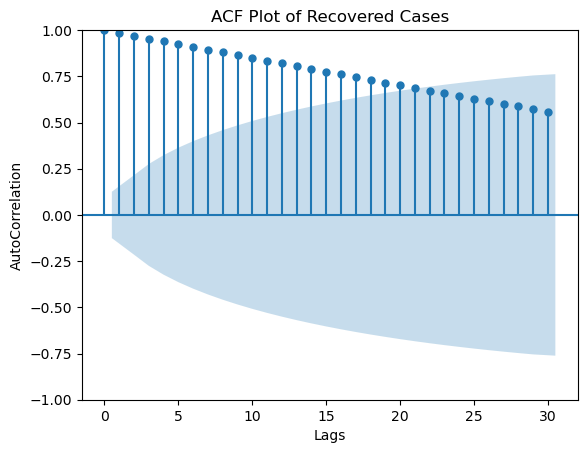

In [45]:
plot_acf(recovered_long_scaled_df['Recovered'], lags =30)
plt.title('ACF Plot of Recovered Cases')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.show()

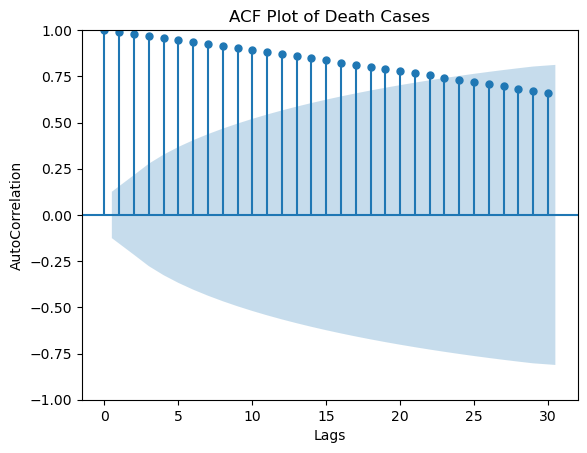

In [46]:
plot_acf(deaths_long_scaled_df['Deaths'], lags =30)
plt.title('ACF Plot of Death Cases')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.show()

As we can see from the ACF plots for confirmed, recovered, and death cases, all three datasets exhibit characteristics of non-stationarity. we'll need to make it stationary before applying ARIMA

### Differencing the data to achieve Stationarity

In [47]:
# Differencing the data
confirmed_diff1 = confirmed_long_scaled_df['Confirmed'].diff().dropna()
recovered_diff1 = recovered_long_scaled_df['Recovered'].diff().dropna()
deaths_diff1 = deaths_long_scaled_df['Deaths'].diff().dropna()

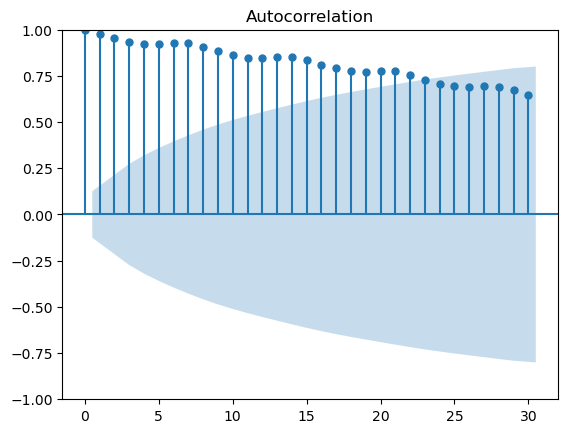

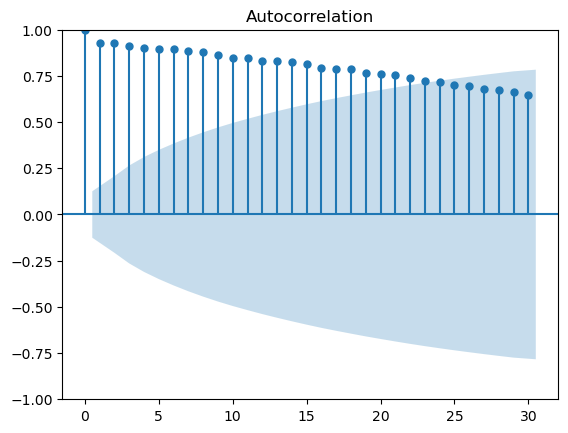

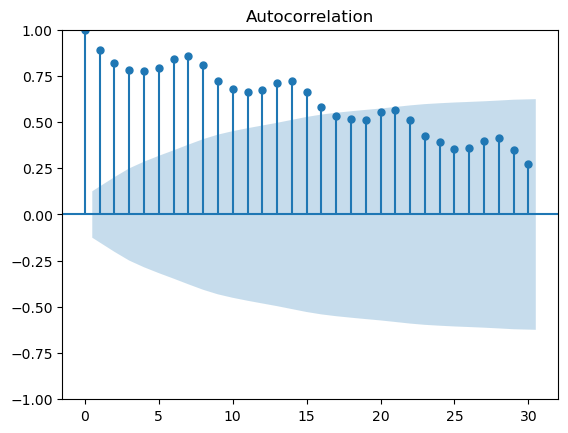

In [48]:
plot_acf(confirmed_diff1, lags =30)
plot_acf(recovered_diff1, lags =30)
plot_acf(deaths_diff1, lags =30)
plt.show()

### second differencing

In [49]:
confirmed_diff2 = confirmed_diff1.diff().dropna()
recovered_diff2 = recovered_diff1.diff().dropna()
deaths_diff2 = deaths_diff1.diff().dropna()

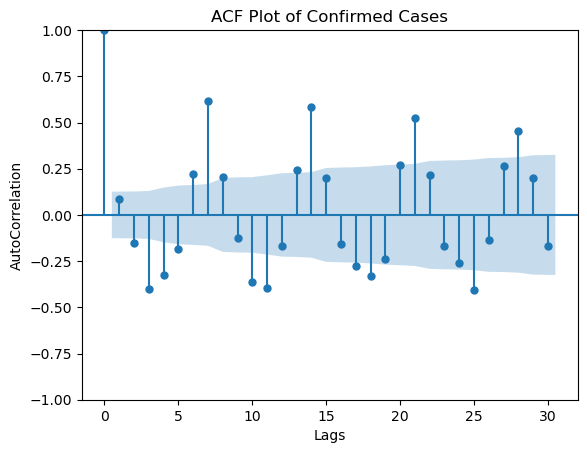

In [50]:
plot_acf(confirmed_diff2, lags =30)
plt.title('ACF Plot of Confirmed Cases')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.show()

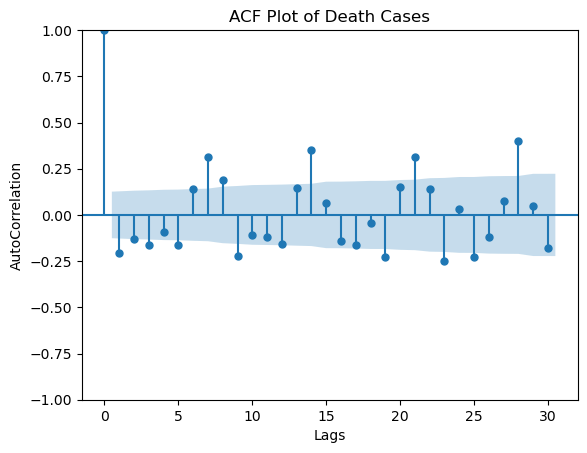

In [51]:
plot_acf(deaths_diff2, lags =30)
plt.title('ACF Plot of Death Cases')
plt.xlabel('Lags')
plt.ylabel('AutoCorrelation')
plt.show()

After applying two rounds of differencing to the time series data, we observed that the plots now oscillate around a constant mean, showing variability in both directions (up and down). This behavior indicates that the time series has achieved stationarity, which is a crucial requirement for many forecasting models. Consequently, we are now ready to proceed with model fitting.